Importation des librairies utiles

In [6]:
from rtlsdr import RtlSdr
import matplotlib.pyplot as plt

Enregistrement de 10 millisecondes de Radio Canada

In [14]:
RATE = 1024000 #rapidité d'acquisition
TEMPS = 0.001 #10ms
NBR = RATE*TEMPS #nombre de mesures prises

def Enregistrement(FREQ):
    # créer un objet connecté au module SDR
    sdr = RtlSdr()
    sdr.sample_rate = RATE
    sdr.center_freq = FREQ
    sdr.gain = 'auto'

    # enregistrer des échantillons I/Q en nombres complexes
    samples = sdr.read_samples(NBR*NBR)
    sdr.close()

    return samples


Graphique de la densité spectrale de puissance

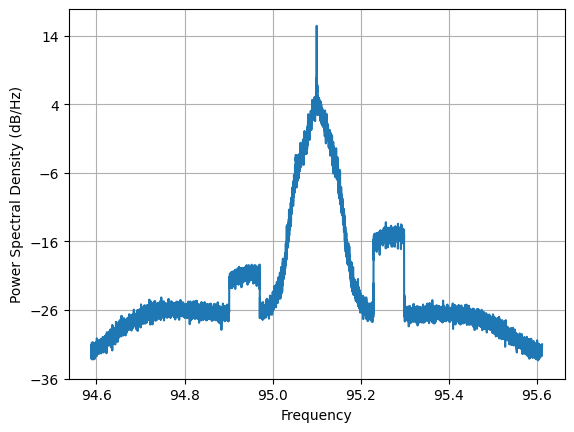

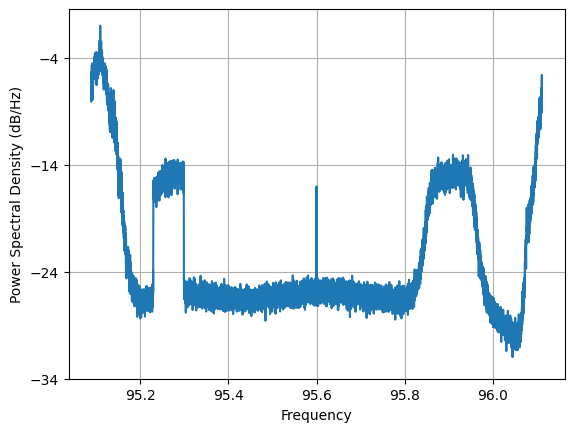

In [22]:
#Données de radio-canada
freq_radiocanada = 95100000
freq_random = 95600000 #aller voir sur le document
samples_radiocanada = Enregistrement(freq_radiocanada)
samples_random = Enregistrement(freq_random)

plt.psd(samples_radiocanada, NFFT=2 ** 14, Fs=RATE / 1e6, Fc=freq_radiocanada / 1e6)
plt.show()

plt.psd(samples_random, NFFT=2 ** 14, Fs=RATE / 1e6, Fc=freq_random / 1e6)
plt.show()